In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
V=pd.DataFrame(data={'x':[1,-2,3,4,-11,6,7,-8,9],'y':[6,7,-3,-13,4,1,8,-5,-2]})

# vectors

In [3]:
V

,x,y
0,1,6
1,-2,7
2,3,-3
3,4,-13
4,-11,4
5,6,1
6,7,8
7,-8,-5
8,9,-2


In [4]:
k=np.argmax(V['x']**2+V['y']**2)
print("vector with maxm. mag (",V['x'].iloc[k],",",V['y'].iloc[k],")")

vector with maxm. mag ( 4 , -13 )


In [ ]:

f=V.drop(index=k,axis=0)
f.reset_index(drop=True,inplace=True)
f['x_']=''
f['y_']=''
f['theta']=''
for i in range(len(V)-1):
    if i==0:
       f['x_'].iloc[i]=f['x'].iloc[i]+V['x'].iloc[k]
       f['y_'].iloc[i]=f['y'].iloc[i]+V['y'].iloc[k]
    else:
       f['x_'].iloc[i]=f['x'].iloc[i]+f['x_'].iloc[i-1]
       f['y_'].iloc[i]=f['y'].iloc[i]+f['y_'].iloc[i-1]
for i in range(len(V)-1):
    if i==0:
       f['theta'].iloc[i]=np.arctan((f['y'].iloc[i]-V['y'].iloc[k])/(f['x'].iloc[i-1]-V['x'].iloc[k]))
    else:
       f['theta'].iloc[i]=np.arctan((f['y'].iloc[i]-f['y_'].iloc[i-1])/(f['x'].iloc[i]-f['x_'].iloc[i-1]))         


# x_ and y_ are resultant of vectors and highest mag. vector and theta is angle between vector and previous resultant vector

In [6]:
f

,x,y,x_,y_,theta
0,1,6,5,-7,1.313473
1,-2,7,3,0,-1.107149
2,3,-3,6,-3,-1.570796
3,-11,4,-5,1,-0.390607
4,6,1,1,2,0.0
5,7,8,8,10,0.785398
6,-8,-5,0,5,0.753151
7,9,-2,9,3,-0.661043


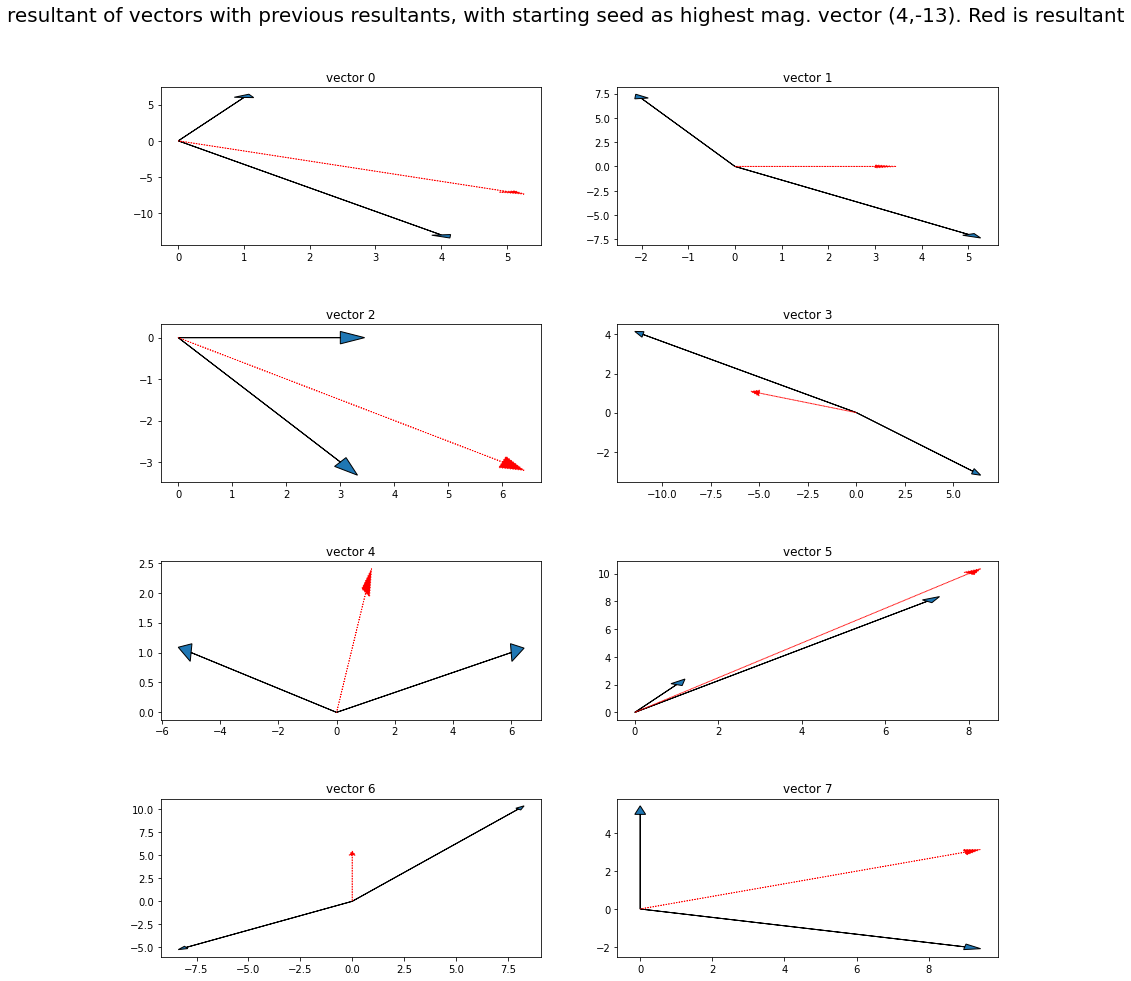

In [7]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15, 16))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("resultant of vectors with previous resultants, with starting seed as highest mag. vector ("+ str(V['x'].iloc[k])+","+str(V['y'].iloc[k])+"). Red is resultant", fontsize=20, y=0.95)
axis = axis.ravel()
for i in range(len(f)):
    if i==0:
       axis[0].arrow(0,0,V['x'].iloc[k],V['y'].iloc[k], head_width = 0.3)
       axis[0].arrow(0,0,f['x'].iloc[0],f['y'].iloc[0], head_width = 0.3)
       axis[0].arrow(0,0,f['x_'].iloc[0],f['y_'].iloc[0],linestyle="dotted" ,head_width = 0.3, color='red')
       axis[i].set_title('vector '+str(i))
    else:
       axis[i].arrow(0,0,f['x_'].iloc[i-1],f['y_'].iloc[i-1], head_width = 0.3)
       axis[i].arrow(0,0,f['x'].iloc[i],f['y'].iloc[i], head_width = 0.3)
       axis[i].arrow(0,0,f['x_'].iloc[i],f['y_'].iloc[i],linestyle="dotted" ,head_width = 0.3, color='red')
       axis[i].set_title('vector '+str(i))
plt.show()   
           
    

# each resultant vector wrt total resultant vector

In [8]:
Vfx=sum(V['x'])
Vfy=sum(V['y'])
print("total resultant vector (",Vfx,",",Vfy,")")

total resultant vector ( 9 , 3 )


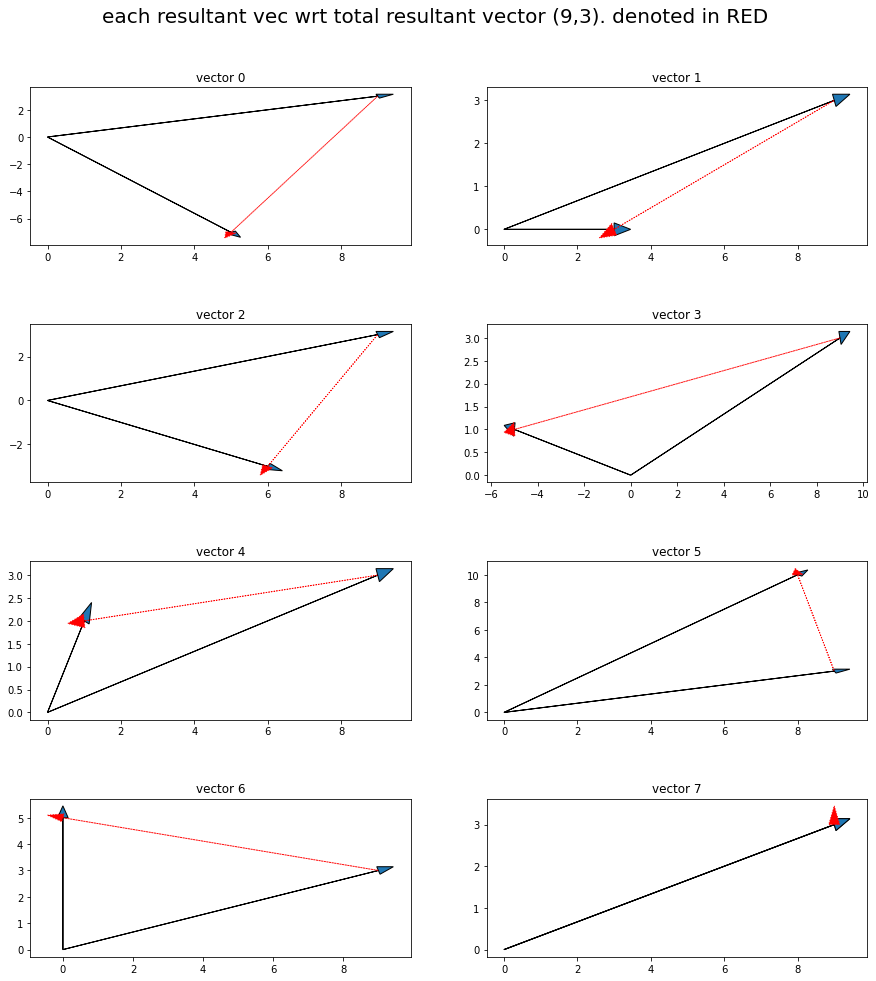

In [9]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15, 16))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("each resultant vec wrt total resultant vector ("+ str(Vfx)+","+str(Vfy)+"). denoted in RED", fontsize=20, y=0.95)
axis = axis.ravel()
for i in range(len(f)):
       axis[i].arrow(0,0,Vfx,Vfy, head_width = 0.3)
       axis[i].arrow(0,0,f['x_'].iloc[i],f['y_'].iloc[i], head_width = 0.3)
       axis[i].arrow(Vfx,Vfy,f['x_'].iloc[i]-Vfx,f['y_'].iloc[i]-Vfy,linestyle="dotted" ,head_width = 0.3, color='red')
       axis[i].set_title('vector '+str(i))
plt.show() 